
# Kierros 3 - Usean kubitin kvanttisysteemi

Palautus KE 22.3.2023 klo 16.15.

$$\def\ket{}\renewcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\def\bra{}\renewcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\def\blue{}\renewcommand{\blue}[1]{{\color{##3daff1}#1}}$$
$$\def\red{}\renewcommand{\red}[1]{{\color{##eb495e}#1}}$$
$$\def\yellow{}\renewcommand{\yellow}[1]{{\color{##a2b70a}#1}}$$
$$\def\purple{}\renewcommand{\purple}[1]{{\color{##7a44e2}#1}}$$
$$\def\ketzero{\begin{bmatrix}1 \\ 0\end{bmatrix}}$$
$$\def\ketone{\begin{bmatrix}0 \\ 1\end{bmatrix}}$$
$$\def\Plus{\texttt{+}}$$
$$\def\Minus{\texttt{-}}$$
$$\def\A{\mathbf{A}}$$
$$\def\B{\mathbf{B}}$$
$$\def\C{\mathbf{C}}$$
$$\def\D{\mathbf{D}}$$
$$\def\I{\mathbf{I}}$$
$$\def\X{\mathbf{X}}$$
$$\def\Y{\mathbf{Y}}$$
$$\def\Z{\mathbf{Z}}$$


## Sisältö

TODO

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import array_to_latex
from IPython.display import Math

plt.style.use('dark_background')
style = {
    "backgroundcolor": "#00000000",
    "textcolor": "#FFFFFFFF",
    "linecolor": "#FFFFFFFF",
    "gatetextcolor": "#FFFFFFFF",
    "barrierfacecolor": "#44444444",
}

# jos tarvitset vaalean väriteeman niin poista # kommenttimerkit seuraavilta riveiltä
# mpl.rcParams.update(mpl.rcParamsDefault)
# style = None

## Usean kubitin piiri

Tähän mennessä olemme käsitelleet ainoastaan yksittäisen kubitin operaattoreita ja piirejä. Seuraavaksi tutustumme usean kubitin järjestelmiin ja kvanttipiireihin.

<img src="./images/bell.png" height="256px">

## Usean kubitin kantatilat

Yhden kubitin laskennalliset kantatilat ovat $\ket 0$ ja $\ket 1$. Usean kubitin järjestelmän laskennalliset kantatilat voidaan esittää _bittijonona_. Bittijono koostuu biteistä, eli merkeistä `0` ja `1`. Bittijonon pituus kertoo kuinka monen kubitin systeemi on kyseessä.

Kahden kubitin laskennalliset kantatilat vastaavat kaikkia kahden pitkiä bittijonoja ketin sisällä:

$$
\ket{00} \\
\ket{01} \\
\ket{10} \\
\ket{11}
$$

Koska kantatilojen tulee muodostaa ortonormaali kanta, voimme päätellä, että neljä kantavektoria virittävät neliulotteisen vektoriavaruuden. Kuinka monta ulottuvuutta on 3 kubitin tilavektorien vektoriavaruudessa?

$N$ pituisia bittijonoja on $2^N$ erilaista, joten 3 kubitin kantatiloja on 8. Kantatilojen lukumääriä eli vektoriavaruuksien ulottuvuuksia voidaan lukea seuraavasta taulukosta. 

$$
\begin{array}{rl}
\text{Kubittien määrä} & \text{Avaruuden ulottuvuus} \\
\hline
1 & 2 \\
2 & 4 \\
3 & 8 \\
4 & 16 \\
25 & 33554432 \\
100 & 1267650600228229401496703205376
\end{array}
$$

Yhden kubitin lisääminen siis tuplaa vektoriavaruuden ulottuvuuden.

### Usean kubitin kantavektorit

Kahden kubitin kantatilat ovat vektoriesityksiltään seuraavat:

$$
\begin{array}{cccc}
\ket{00}=\begin{bmatrix}1 \\ 0 \\ 0 \\0\end{bmatrix} &
\ket{01}=\begin{bmatrix}0 \\ 1 \\ 0 \\0\end{bmatrix} &
\ket{10}=\begin{bmatrix}0 \\ 0 \\ 1 \\0\end{bmatrix} &
\ket{11}=\begin{bmatrix}0 \\ 0 \\ 0 \\1\end{bmatrix}
\end{array}
$$

On syytä huomioida, että $\ket 0 \ne \ket{00}$, koska vektorien ulottuvuudet ovat erisuuret. Opimme kohta, miten usean kubitin tilavektori voidaan muodostaa yksittäisten kubittien tilavektoreista _tensoritulolla_.

## Mittaus usean kubitin piirissä

Kuten edellisellä kierroksella opimme, todennäköisyys, jolla kubitti $\ket \psi$ havaitaan tilassa $\ket x$ on:

$$
P(\ket x) = \left|\braket{x | \psi}\right|^2
$$

Sama kaava toimii usean kubitin tilavektoreilla. Esimerkiksi todennäköisyys havaita tila $\ket{00}$ tilassa $\ket{01}$ on

$$
\begin{array}{rlllll}
P(\ket{01}) &=& \left|\braket{00 | 01}\right|^2 \\
&=& \left|\begin{bmatrix}1 & 0 & 0 & 0\end{bmatrix}\begin{bmatrix}0 \\ 1 \\ 0 \\ 0\end{bmatrix}\right|^2 \\
&=& 0
\end{array}
$$

Sama tulos saataisiin laskemalla yksittäisten todennäköisyyksien tulo, joka vastaa todennäköisyyttä että toisistaan riippumattomat tapahtumat tapahtuvat. Kutsutaan ensimmäistä kubittia systeemiksi $A$ ja toista kubittia systeemiksi $B$. Molemmat systeemit ovat tilassa $\ket 0$. Todennäköisyys siis havaita yhdistelmäjärjestelmä $AB$ tilassa $\ket{01}$ on:

$$
\begin{array}{rlllll}
P_{AB}(\ket{01}) &=& P_A(\ket 0) \cdot P_B(\ket 1) \\
&=& 1 \cdot 0
\end{array}
$$

Tätä kaavaa ei voi käyttää jos järjestelmät olisivat toisistaan riippuvia eli lomittuneita, koska yksittäisiä kubitteja ei voi enää esittää tilavektoreilla. Tämä on tärkeä ero klassisen ja kvanttimekaniikan välillä.

TODO linkki tehtävään

### Klassinen rekisteri

Kvanttipiirissä suoritetut mittaukset tallennetaan aina _klassiseen rekisteriin_. Klassinen rekisteri piirretään kahdella rinnakkaisella viivalla. Klassiseen rekisteriin yleensä varataan tilaa yhtä monelle bitille kuin piirissä on mittauksia.

Klassisen rekisterin koko näkyy sen alkupäässä. Esimerkiksi 3 bitin klassinen rekisteri näyttää seuraavalta:

![creg](./images/creg.png)

Kuten opimme 2. kierroksella, voimme määrätä klassisen rekisterin koon samalla kun luomme kvanttipiirin Qiskitillä:

```python
circuit = QuantumCircuit(3, 3) # 3 kubittia, 3 bitin klassinen rekisteri
```

Voimme lisätä mittaukset piiriin kaikille kubiteille käyttämällä metodia `measure_all()`:

```python
# kvanttipiirin lopuksi
circuit.measure_all(add_bits=False)
```

> Argumentti `add_bits=False` käyttää aikaisemmin luotua klassista rekisteriä. Muuten `measure_all` loisi uuden klassisen rekisterin. Huomaa myös, että `measure_all` lisää harmaan visuaalisen erottimen ennen mittauksia.

Mittaustulos tallennetaan klassisen rekisterin bittijonoon oikealta vasemmalle, eli klassisen rekisterin indeksi `0` vastaa viimeistä bittijonon bittiä:

<img src="./images/measreg.png" height="384px">

Jos bittijonoa ajatellaan lukuna binääriesityksessä, pienempi indeksi vastaa pienempää merkitsevää numeroa.

## Lomittumaton piiri

Seuraavassa kvanttipiirissä on kolme kubittia, jotka kaikki pyöritetään $\ket \Plus$ tilaan Hadamard-porteilla. Intuition mukaan kyseisen piirin kubittien mittaukset ovat toisistaan riippumattomia tapahtumia, koska kubitit eivät vuorovaikuta keskenään — piirissä ei siis esiinny **lomittumista**. Miltä näyttäisi mittaustulosten todennäköisyysjakauma?

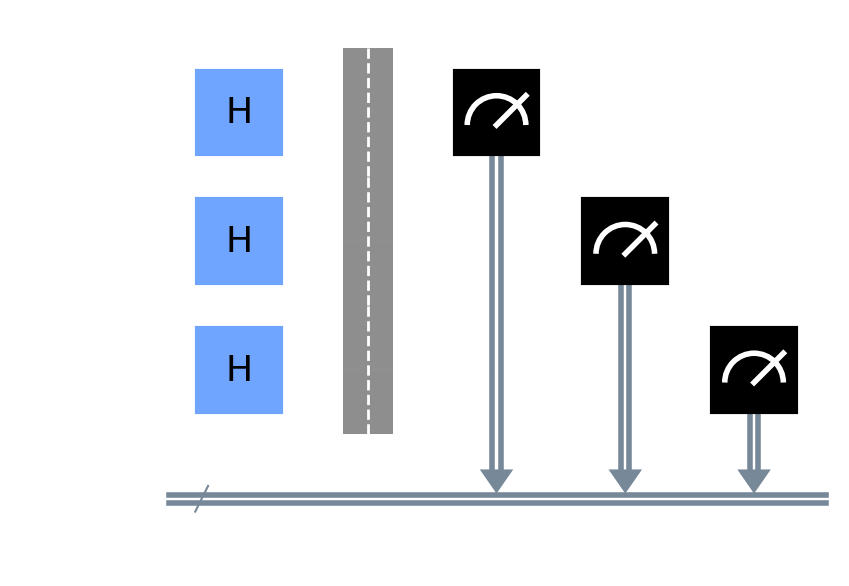

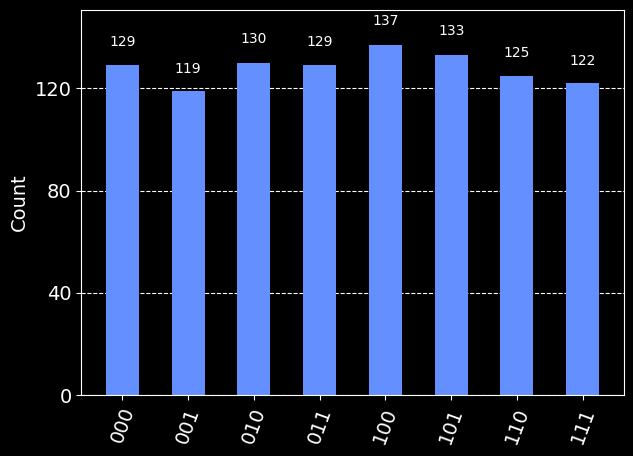

In [42]:
circuit = QuantumCircuit(3, 3) # 3 kubittia, 3 bitin klassinen rekisteri

circuit.h([0, 1, 2]) # operoidaan Hadamardilla kaikkiin kubitteihin

circuit.measure_all(add_bits=False)
display(circuit.draw(output='mpl', scale=2, style=style))

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

Yllä olevan koodin piirtämät mittaustulokset muodostavat tasaisen todennäköisyysjakauman (laskennallisessa mittauskannassa). Jokainen pylväs vastaa eri kollektiivista mittaustulosta. Mittaustulos `100` tarkoittaa, että kubitti $q_2$ (alin) havaittiin tilassa $\ket 1$ ja muut tilassa $\ket 0$.

Voimme myös huomata, että yhden kubitin mittauksesta ei voi päätellä toisten kubittien mittaustuloksista (tai ylipäätään kubittien tilasta) mitään.

<img src="./images/results1.png" height="512px">
<img src="./images/results2.png" height="512px">

Kuvasta näkee, että kubitin $q_2$ mittauksesta saatu tulos (isolla) ei korreloi kubittien $q_0$ ja $q_1$ mittaustulosten kanssa, vaan todennäköisyysjakaumat ovat samat (vaihtelu johtuu satunnaisuuskohinasta). Intuitio riippumattomuudesta siis piti paikkansa.

Jotta voimme laskea todennäköisyyden, jolla kyseinen tila $\ket{\Plus\Plus\Plus}$ havaitaan tilassa $\ket{000}$, pitää meidän esittää tila ensiksi kantavektoktorien lineaarikombinaationa.

Koska jokainen tulos on yhtä todennäköinen, ovat amplitudien itseisarvojen oltava yhtäsuuret. Tiedämme myös, että 8 mittaustulosten todennäköisyyksien summa on 1, joten voimme laskea yksittäisen kantatilan amplitudin seuraavasti:

$$
\begin{array}{rlllll}
8\cdot|\alpha|^2 &=& 1 \\
|\alpha| &=& \sqrt{\frac 1 8}
\end{array}
$$

Tila $\ket{\Plus\Plus\Plus}$ voi esittää kantatilojen lineaarikombinaationa:

$$
\ket{\Plus\Plus\Plus} = \sqrt{\frac 1 8}\left(\ket{000}+\ket{001}+\ket{010}+\ket{011}+\ket{100}+\ket{101}+\ket{110}+\ket{111}\right)
$$

> Emme vielä käsittele amplitudien _kompleksista vaihetta_, mutta on hyvä tietää, että amplitudit voisivat yhtä hyvin olla negatiivisia vastalukujaan. Mittaustuloksista ei voi saada tietoa kompleksisesta vaiheesta, joten tila voisi yhtä hyvin olla $\ket{\Plus\Minus\Minus}$.

Voimme nyt laskea todennäköisyyden havaita tila $\ket \psi = \ket{\Plus\Plus\Plus}$ tilassa $\ket{000}$:

$$
\begin{array}{rlllll}
P(\ket x) &=& \left|\braket{x | \psi}\right|^2 \\
P(\ket{000}) &=& \left|\braket{000 | \Plus\Plus\Plus}\right|^2 \\
&=& \left|\bra{000}\cdot\sqrt{\frac 1 8}\left(\ket{000}+\ket{001}+\ket{010}+\ket{011}+\ket{100}+\ket{101}+\ket{110}+\ket{111}\right)\right|^2 \\
&=& \left|\sqrt{\frac 1 8}\left(\braket{000 | 000}+\cancel{\braket{000 | 001}}+\cancel{\braket{000 | 010}}+\cancel{\braket{000 | 011}}+\cancel{\braket{000 | 100}}+\cancel{\braket{000 | 101}}+\cancel{\braket{000 | 110}}+\cancel{\braket{000 | 111}}\right)\right|^2 \\
&=& \frac 1 8
\end{array}
$$

Tätä laskennallisten kantatilojen tasaista superpositiota $\ket{\Plus\mathellipsis\Plus}$ käytetään paljon kvanttialgoritmeissä.

## Tensoritulo

Tensoritulo on abstrakti matemaattinen operaattori, joka kuvaa kaksi vektoriavaruutta yhdeksi isoksi vektoriavaruudeksi. Toisin kuin matriisitulo, tensoritulo voidaan ottaa eriulotteisista matriiseista. Matriisien tensorituloa kutsutaan myös nimellä Kroneckerin tulo. 

> Teknisesti ottaen tensoritulo on yleisempi kuin Kroneckerin tulo, mutta käytämme tällä kurssilla vain termiä tensoritulo.

Tensoritulo voidaan laskea kahdesta matriisista $\A$ ja $\B$ _lohkomatriisiesityksellä_ seuraavasti:

$$
\A \otimes \B ={\begin{bmatrix}\A_{11}\B &\cdots &\A_{1n}\B \\\vdots &\ddots &\vdots \\\A_{m1}\B &\cdots &\A_{mn}\B \end{bmatrix}},\\[1em]
\A \in \mathbb{C}^{m×n}, \B \in \mathbb{C}^{p×q}, \A \otimes \B \in \mathbb{C}^{pm×qn}
$$

Jos kyseessä on siis kaksi 2-ulotteista matriisia ($\mathbb{C}^{2×2}$), niin niiden tensoritulo on neliulotteinen matriisi ($\mathbb{C}^{4×4}$):

$$
{\begin{bmatrix}
1 & 2 \\
3 & 4 \\
\end{bmatrix}} \otimes {\begin{bmatrix}
0 & 5 \\
6 & 7 \\
\end{bmatrix}}
={\begin{bmatrix} 1 {\begin{bmatrix}
0 & 5 \\
6 & 7 \\
\end{bmatrix}} & 2 {\begin{bmatrix}
0 & 5 \\
6 & 7 \\
\end{bmatrix}} \\
3{\begin{bmatrix}
0 & 5 \\
6 & 7 \\
\end{bmatrix}} & 4 {\begin{bmatrix}
0 & 5 \\
6 & 7 \\
\end{bmatrix}} \\
\end{bmatrix}}
={\begin{bmatrix}
1\cdot 0 & 1\cdot 5 & 2\cdot 0 & 2\cdot 5 \\
1\cdot 6 & 1\cdot 7 & 2\cdot 6 & 2\cdot 7 \\
3\cdot 0 & 3\cdot 5 & 4\cdot 0 & 4\cdot 5 \\
3\cdot 6 & 3\cdot 7 & 4\cdot 6 & 4\cdot 7 \\
\end{bmatrix}}
={\begin{bmatrix}
0 & 5 & 0 & 10 \\
6 & 7 & 12 & 14 \\
0 & 15 & 0 & 20 \\
18 & 21 & 24 & 28
\end{bmatrix}}
$$

> [Lue lisää lohkomatriiseista](https://en.wikipedia.org/wiki/Block_matrix) tai [Kroneckerin tulosta](https://en.wikipedia.org/wiki/Kronecker_product).

### Kvanttitilojen tensorointi

Kvanttimekaniikassa pystymme ilmaisemaan monta järjestelmää yhtenä järjestelmänä tensoroimalla järjestelmien tilat. Esimerkiksi kolme kubittia kaikki tilassa $\ket \Plus$ voidaan esittää yhtenä tilavektorina seuraavasti:

$$
\begin{array}{rrrrrrr}
\ket{\Plus\Plus\Plus} =& \ket \Plus & \otimes & \ket \Plus & \otimes & \ket \Plus \\[1em]
=& \frac 1 {\sqrt 2} \blue{\begin{bmatrix}1 \\ 1\end{bmatrix}} & 
    \otimes & \frac 1 {\sqrt 2} \red{\begin{bmatrix}1 \\ 1\end{bmatrix}} &
    \otimes & \frac 1 {\sqrt 2} \yellow{\begin{bmatrix}1 \\ 1\end{bmatrix}} \\[1em]
=& \frac 1 {2 \sqrt 2} \blue{\begin{bmatrix}1 \\ 1\end{bmatrix}} &
    \otimes & \red{\begin{bmatrix}1 \\ 1\end{bmatrix}} &
    \otimes & \yellow{\begin{bmatrix}1 \\ 1\end{bmatrix}} \\[1em]
=& \frac 1 {2 \sqrt 2} \purple{\begin{bmatrix}1 \\ 1 \\ 1 \\ 1 \end{bmatrix}} &
    \otimes & \yellow{\begin{bmatrix}1 \\ 1\end{bmatrix}} \\[1em]
=& \frac 1 {2 \sqrt 2} \begin{bmatrix}1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} \\[1em]
\end{array}
$$

> Tensoritulo lasketaan laskujärjestyksessä summan ja tulon välissä. Kuten matriisitulossa, tensoritulossa laskujärjestyksellä ei ole väliä, joten sulkuja ei tarvita.

Tilavektorista voidaankin jo suoraan nähdä että jokaisen kantatilan amplitudi on sama.

### Notaatioista

Kvanttitilojen tensoroinnille määritellään seuraavat notaatiot nopeuttamaan kirjoittamista:

$$
\begin{array}{rllllll}
\ket a \otimes \ket b &=& \ket a \ket b &=& \ket{ab}
\end{array}
$$

Tilat $\ket a$ ja $\ket b$ voivat olla myös eriulotteisia, esimerkiksi:

$$
\ket{01} \otimes \ket\Plus = \ket{01\Plus}
$$

## Tensoritulo Pythonissa

Tensorituloja pystytään laskemaan Pythonissa käyttäen numpy-kirjaston `kron`-funktiota.

In [52]:
zero = np.matrix([[1], [0]])
one = np.matrix([[0], [1]])
plus = 1 / np.sqrt(2) * (zero + one)
minus = 1 / np.sqrt(2) * (zero - one)

display(Math("\ket{01+}"))
psi = np.kron(np.kron(zero, one), plus)
display(array_to_latex(psi))

display(Math("\ket{+++}"))
phi = np.kron(np.kron(plus, plus), plus)
display(array_to_latex(phi))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

## $\text{CNOT}$-portti ja lomittuminen

## Bellin tilat

## Kvanttipiirin unitaarinen matriisi

## $\text{SWAP}$

<details>
<summary>Fredkin portti eli ohjattu $SWAP$</summary>

</details>

## Kubitin vaihe

## $\text{CZ}$-portti

<details>
<summary>Mittaus projektiomatriiseilla</summary>
</details>